# Importing data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Importing-data.ipynb)

**by Kozo Nishida, Alexander Pico, Barry Demchak**

**py4cytoscape 1.3.0**

This notebook will show you how to import a pandas.DataFrame of node attributes into Cytoscape as Node Table columns. The same approach works for edge and network attriubutes.

## Prerequisites
There are two options for using py4cytoscape.

1. **LOCAL** Cytoscape (3.9.1 or greater) + **Local** Jupyter environment (including py4cytoscape).
2. **LOCAL** Cytoscape (3.9.1 or greater) + **Remote** Jupyter environment (including py4cytoscape).

### Setup required for option **1.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Install Jupyter on your PC. (See https://jupyter.org/install)
- Install py4cytoscape with `pip install py4cytoscape` on your PC.

### Setup required for option **2.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Run the next cell.
  The next cell installs py4cytoscape in the **REMOTE** Jupyter environment and set up [Jupyter-Bridge](https://github.com/cytoscape/jupyter-bridge).
  (If you use your **LOCAL** Jupyter environment in **your desktop machine** same with Cytoscape, you can **skip** the next cell.)

In [ ]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

### Sanity test to verify Cytoscape connection

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

By now, the connection to Cytoscape should be up and available. To verify this, try a simple operation that doesn't alter the state of Cytoscape.

In [2]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.4.0',
 'py4cytoscapeVersion': '1.3.0'}

## Always Start with a Network

When importing data, you are actually performing a merge function of sorts, appending columns to nodes (or edges) that are present in the referenced network. Data that do not match elements in the network are effectively discarded upon import.

So, in order to demonstrate data import, we first need to have a network. This command will import network files in any of the supported formats (e.g., SIF, GML, XGMML, etc).

In order to import the “SIF” file into Cytoscape, it must be on the local machine where Cytoscape installed, not on Colab. So use the FileTransfer App to send the SIF file to your local file system from Colab.

This operation is necessary even if you are using a local Jupyter Notebook instead of Colab. (This prevents reproducibility problems depending on the file path.)

In [3]:
p4c.sandbox_url_to("https://raw.githubusercontent.com/cytoscape/cytoscape-automation/master/for-scripters/Python/data/galFiltered.sif", "galFiltered.sif")

{'filePath': 'C:\\Users\\hoge\\Documents\\GitHub\\cytoscape-automation\\for-scripters\\Python\\galFiltered.sif',
 'fileByteCount': 6861}

If you are using py4cytoscape in Jupyter Notebook, `import_network_from_file` will always try to read the file under the sandbox filepath.

In [4]:
p4c.import_network_from_file("galFiltered.sif")

{'networks': [124], 'views': [2233]}

You should now see a network with just over 300 nodes. If you look at the Node Table, you’ll see that there are no attributes other than node names. Let’s fix that…

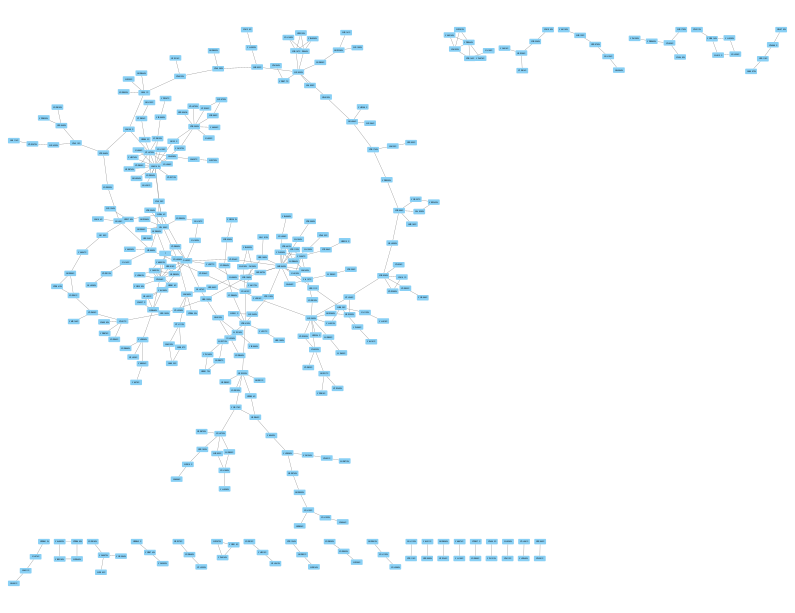

In [5]:
p4c.notebook_export_show_image()

## Import Data
You can import data into Cytoscape from any pandas.DataFrame in Python as long as it contains row names (or an arbitrary column) that match a Node Table column in Cytoscape. In this example, we are starting with a network with yeast identifiers in the “name” column. We also have a CSV file with gene expression data values keyed by yeast identifiers here:

In [6]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galExpData.csv")

In [7]:
data

,name,COMMON,gal1RGexp,gal1RGsig,gal4RGexp,gal4RGsig,gal80Rexp,gal80Rsig
0,YDL194W,SNF3,0.139,1.804300e-02,0.333,3.396100e-02,0.449,1.134800e-02
1,YDR277C,MTH1,0.243,2.190000e-05,0.192,2.804400e-02,0.448,5.730000e-04
2,YBR043C,YBR043C,0.454,5.370000e-08,0.023,9.417800e-01,0.000,9.999990e-01
3,YPR145W,ASN1,-0.195,3.170000e-05,-0.614,1.150000e-07,-0.232,1.187300e-03
4,YER054C,GIP2,0.057,1.695800e-01,0.206,6.200000e-04,0.247,4.360300e-03
...,...,...,...,...,...,...,...,...
324,YOR204W,DED1,-0.033,3.994400e-01,-0.056,3.126800e-01,-0.910,8.350000e-16
325,YGL097W,SRM1,0.160,2.191300e-03,-0.230,2.246100e-03,0.008,9.382600e-01
326,YGR218W,CRM1,-0.018,6.138100e-01,-0.001,9.794000e-01,-0.018,8.096900e-01
327,YGL122C,NAB2,0.174,8.730000e-04,0.020,6.170700e-01,0.187,5.996600e-03


**Note: there may be times where your network and data identifers are of different types. This calls for identifier mapping. py4cytoscape provides a function to perform ID mapping in Cytoscape:**

In [8]:
?p4c.map_table_column

Signature:
p4c.map_table_column(
    column,
    species,
    map_from,
    map_to,
    force_single=True,
    table='node',
    namespace='default',
    network=None,
    base_url='http://127.0.0.1:1234/v1',
)
Docstring:
Map Table Column.

Perform identifier mapping using an existing column of supported identifiers to populate a new column with
identifiers mapped to the originals.

Supported species: Human, Mouse, Rat, Frog, Zebrafish, Fruit fly, Mosquito, Worm, Arabidopsis thaliana, Yeast,
E. coli, Tuberculosis. Supported identifier types (depending on species): Ensembl, Entrez Gene, Uniprot-TrEMBL,
miRBase, UniGene,  HGNC (symbols), MGI, RGD, SGD, ZFIN, FlyBase, WormBase, TAIR.

Args:
    column (str): Name of column containing identifiers of type specified by ``map.from``
    species (str): Common name for species associated with identifiers, e.g., Human. See details.
    map_from (str): Type of identifier found in specified ``column``. See details.
    map.to (str): Type of identi

Check out the Identifier mapping notebook for detailed examples.

Now we have a pandas.DataFrame that includes our identifiers in a column called “name”, plus a bunch of data columns. Knowing our key columns, we can now perform the import:

In [9]:
p4c.get_table_columns()

,SUID,shared name,name,selected
1025,1025,YKL211C,YKL211C,False
515,515,YNL236W,YNL236W,False
1027,1027,YER090W,YER090W,False
517,517,YKL012W,YKL012W,False
1031,1031,YDR354W,YDR354W,False
...,...,...,...,...
1527,1527,YDR277C,YDR277C,False
507,507,YDR184C,YDR184C,False
1019,1019,YDR146C,YDR146C,False
1531,1531,YDL194W,YDL194W,False


In [10]:
p4c.load_table_data(data, data_key_column="name")

'Success: Data loaded in defaultnode table'

If you look back at the Node Table, you’ll now see that the corresponding rows of our pandas.DataFrame have been imported as new columns.


In [11]:
p4c.get_table_columns()

,SUID,shared name,name,selected,COMMON,gal1RGexp,gal1RGsig,gal4RGexp,gal4RGsig,gal80Rexp,gal80Rsig
1025,1025,YKL211C,YKL211C,False,TRP3,-0.183,0.000166,-0.6,0.0,0.358,0.000153
515,515,YNL236W,YNL236W,False,SIN4,-0.146,0.018347,-0.218,0.053936,-0.141,0.39009
1027,1027,YER090W,YER090W,False,TRP2,-0.067,0.079619,-0.38,0.00002,0.231,0.001577
517,517,YKL012W,YKL012W,False,PRP40,0.21,0.000427,-0.277,0.000354,0.561,0.000087
1031,1031,YDR354W,YDR354W,False,TRP4,-0.122,0.009028,-0.202,0.00282,-0.253,0.001209
...,...,...,...,...,...,...,...,...,...,...,...
1527,1527,YDR277C,YDR277C,False,MTH1,0.243,0.000022,0.192,0.028044,0.448,0.000573
507,507,YDR184C,YDR184C,False,ATC1,0.04,0.4641,-0.886,0.000001,0.404,0.10407
1019,1019,YDR146C,YDR146C,False,SWI5,-0.19,0.001854,0.102,0.1065,-0.027,0.76249
1531,1531,YDL194W,YDL194W,False,SNF3,0.139,0.018043,0.333,0.033961,0.449,0.011348


**Note: we relied on the default values for table (“node”) and table_key_column (“name”), but these can be specified as well. See help docs for parameter details.**

In [12]:
?p4c.load_table_data

Signature:
p4c.load_table_data(
    data,
    data_key_column='row.names',
    table='node',
    table_key_column='name',
    namespace='default',
    network=None,
    base_url='http://127.0.0.1:1234/v1',
)
Docstring:
Loads data into Cytoscape tables keyed by row.

This function loads data into Cytoscape node/edge/network
tables provided a common key, e.g., name. Data.frame column names will be
used to set Cytoscape table column names.
Numeric values will be stored as Doubles in Cytoscape tables.
Integer values will be stored as Integers. Character or mixed values will be
stored as Strings. Logical values will be stored as Boolean. Lists are
stored as Lists by CyREST v3.9+. Existing columns with the same names will
keep original type but values will be overwritten.

Args:
    data (dataframe): each row is a node and columns contain node attributes
    data_key_column (str): name of data.frame column to use as key; ' default is "row.names"
    table (str): name of Cytoscape table to lo